**Notebook Outline:**  
  
- [Setup with libraries](#Set-up-Cell)
- [List bandwidths from pickles](#List-bandwidths-from-pickles)
- [Parameter functions](#Parameter-functions)
- [GWR bandwidth](#GWR-bandwidth)
- [MGWR bandwidths](#MGWR-bandwidths)
- [AIC, AICc, BIC check](#AIC,-AICc,-BIC-check)
    - [AIC, AICc, BIC Boxplots for comparison](#AIC,-AICc,-BIC-Boxplots-for-comparison)
- [Parameter comparison from MGWR and GWR](#Parameter-comparison-from-MGWR-and-GWR)

Monte Carlo experiment code can be found in path mgwr/notebooks/Poisson_MC_script/

### Set up Cell

In [193]:
import warnings
warnings.filterwarnings("ignore")
import pickle
import sys
import seaborn as sns
import numpy as np
sys.path.append("C:/Users/msachde1/Downloads/Research/Development/mgwr/notebooks/Binomial_MC_script_2/")
import model_mc
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.axes_grid1 import make_axes_locatable

### List bandwidths from pickles

In [194]:
mgwr_bw0=[]
mgwr_bw1=[]
mgwr_bw2=[]
gwr_bw=[]

In [195]:
for i in range(0,500,50):
    p1 = pickle.load( open( "C:/Users/msachde1/Downloads/Research/Development/mgwr/notebooks/Binomial_MC_script_2/pkls/results-{}-{}.pkl".format(str(i), str(i+50)),"rb") )
    for j in range(50):
        mgwr_bw0.append(p1[j].mgwr_bw[0][0])
        mgwr_bw1.append(p1[j].mgwr_bw[0][1])
        mgwr_bw2.append(p1[j].mgwr_bw[0][2])
        gwr_bw.append(p1[j].gwr_bw[0])

### Parameter functions

In [196]:
def add(a,b):
    return 1+((1/120)*(a+b))

def con(u,v):
    return (0*(u)*(v))+0.3

def sp(u,v):
    return 1+1/3240*(36-(6-u/2)**2)*(36-(6-v/2)**2)

def med(u,v):
    B = np.zeros((25,25))
    for i in range(25):
        for j in range(25):
            
            if u[i][j]<=8:
                B[i][j]=0.2
            elif u[i][j]>17:
                B[i][j]=0.7
            else:
                B[i][j]=0.5
    return B

In [197]:
x = np.linspace(0, 25, 25)
y = np.linspace(25, 0, 25)
X, Y = np.meshgrid(x, y)

B0=con(X,Y)
#B1=add(X,Y)
B1=sp(X,Y)
B2=med(X,Y)

In [198]:
x = np.linspace(0, 25, 25)
y = np.linspace(25, 0, 25)

In [199]:
x = np.linspace(0, 25, 25)
y = np.linspace(25, 0, 25)

### GWR bandwidth

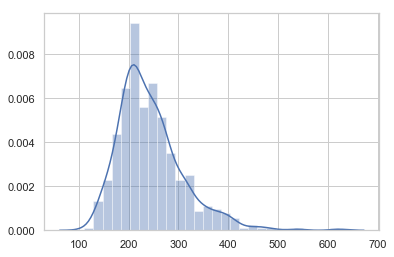

In [200]:
sns.distplot(gwr_bw)

In [201]:
np.mean(gwr_bw)

243.452

### MGWR bandwidths

([], <a list of 0 Text yticklabel objects>)

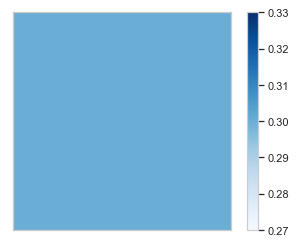

In [202]:
plt.imshow(B0, extent=[0,10, 0, 10], origin='lower',cmap='Blues')
plt.colorbar()
plt.axis(aspect='image')
plt.xticks([])
plt.yticks([])

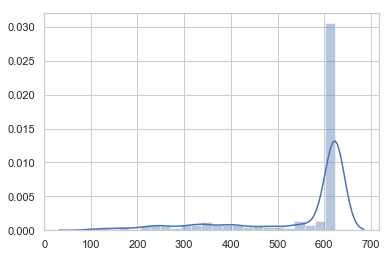

In [203]:
sns.distplot(mgwr_bw0)

In [204]:
np.mean(mgwr_bw0)

546.514

([], <a list of 0 Text yticklabel objects>)

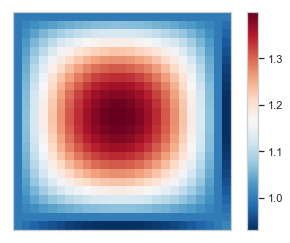

In [205]:
plt.imshow(B1, extent=[0,25, 0, 25], origin='lower',cmap='RdBu_r')
plt.colorbar()
plt.axis(aspect='image')
plt.xticks([])
plt.yticks([])

In [206]:
np.mean(mgwr_bw1)

225.6

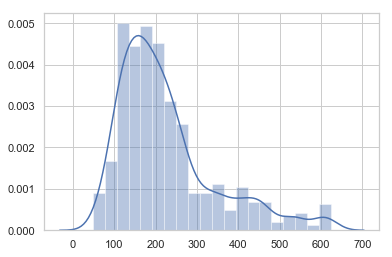

In [207]:
sns.distplot(mgwr_bw1)

([], <a list of 0 Text yticklabel objects>)

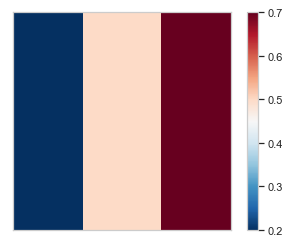

In [208]:
plt.imshow(B2, extent=[0,25, 0, 25], origin='lower',cmap='RdBu_r')
plt.colorbar()
plt.axis(aspect='image')
plt.xticks([])
plt.yticks([])

In [209]:
np.mean(mgwr_bw2)

508.152

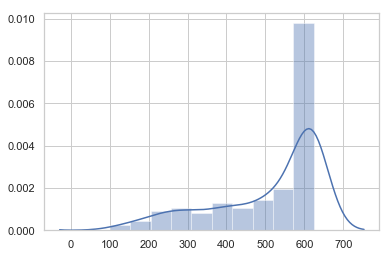

In [210]:
sns.distplot(mgwr_bw2)

In [211]:
np.mean(mgwr_bw0),np.mean(mgwr_bw1),np.mean(mgwr_bw2)

(546.514, 225.6, 508.152)

### AIC, AICc, BIC check

In [212]:
mgwr_aicc=[]
gwr_aicc=[]
mgwr_bic=[]
gwr_bic=[]
mgwr_aic=[]
gwr_aic=[]
mgwr_params=[]
gwr_params=[]
mgwr_predy=[]
gwr_predy=[]

In [213]:
for i in range(0,500,50):
    p1 = pickle.load( open( "C:/Users/msachde1/Downloads/Research/Development/mgwr/notebooks/Binomial_MC_script_2/pkls/results-{}-{}.pkl".format(str(i), str(i+50)),"rb") )
    for j in range(50):
        mgwr_aicc.append(p1[j].mgwr_aicc[0])
        gwr_aicc.append(p1[j].gwr_aicc[0])
        
        mgwr_bic.append(p1[j].mgwr_bic[0])
        gwr_bic.append(p1[j].gwr_bic[0])
        
        mgwr_aic.append(p1[j].mgwr_aic[0])
        gwr_aic.append(p1[j].gwr_aic[0])
        
        mgwr_params.append(p1[j].mgwr_params[0])
        gwr_params.append(p1[j].gwr_params[0])
        
        mgwr_predy.append(p1[j].mgwr_predy[0])
        gwr_predy.append(p1[j].gwr_predy[0])

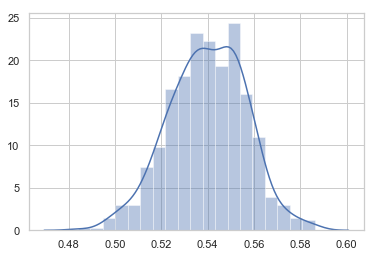

In [214]:
sns.distplot(np.mean(gwr_predy,axis=0))

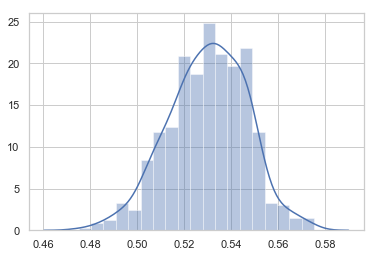

In [215]:
sns.distplot(np.mean(mgwr_predy,axis=0))

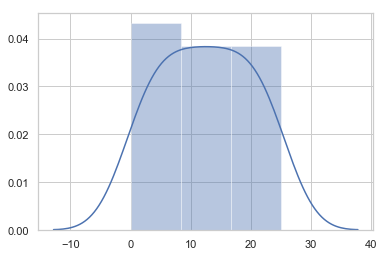

In [216]:
sns.distplot(y)

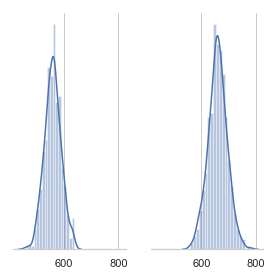

In [217]:
f, axes = plt.subplots(1, 2, figsize=(4, 4), sharex=True)
sns.despine(left=True)
sns.distplot(mgwr_bic,ax=axes[0])
sns.distplot(gwr_bic,ax=axes[1])

plt.setp(axes, yticks=[])
plt.tight_layout()

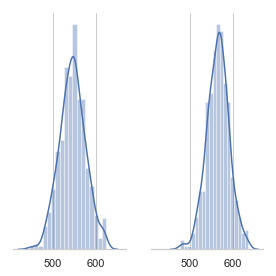

In [218]:
f, axes = plt.subplots(1, 2, figsize=(4, 4), sharex=True)
sns.despine(left=True)
sns.distplot(mgwr_aic,ax=axes[0])
sns.distplot(gwr_aic,ax=axes[1])

plt.setp(axes, yticks=[])
plt.tight_layout()

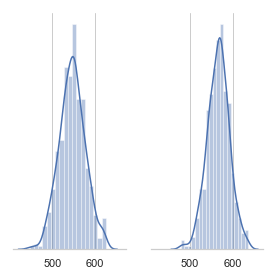

In [219]:
f, axes = plt.subplots(1, 2, figsize=(4, 4), sharex=True)
sns.despine(left=True)
sns.distplot(mgwr_aicc,ax=axes[0])
sns.distplot(gwr_aicc,ax=axes[1])

plt.setp(axes, yticks=[])
plt.tight_layout()

In [220]:
np.mean(mgwr_aicc), np.mean(gwr_aicc)

(546.5515752396055, 566.4198004263142)

In [221]:
np.mean(mgwr_aic), np.mean(gwr_aic)

(546.5129233438336, 564.7185104869004)

In [222]:
np.mean(mgwr_bic), np.mean(gwr_bic)

(559.82695691136, 659.7177607327515)

#### AIC, AICc, BIC Boxplots for comparison

In [229]:
model=[]
model = ['gwr']*500
model2 = ['mgwr']*500
model=model+model2

In [230]:
aic=[]
aic=gwr_aic
aic=aic+mgwr_aic

In [231]:
aicc=[]
aicc=gwr_aicc
aicc=aicc+mgwr_aicc

In [232]:
bic=[]
bic=gwr_bic
bic=bic+mgwr_bic

In [233]:
d = {'aic':aic,'bic':bic,'aicc':aicc,'model':model}

In [234]:
df=pd.DataFrame(data=d)

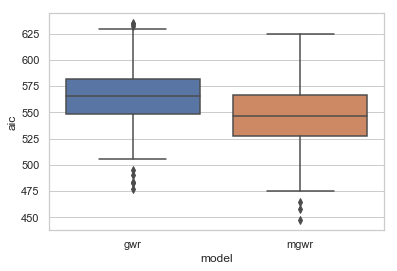

In [235]:
sns.set(style="whitegrid")
ax = sns.boxplot(y=df['aic'],x=df['model'])

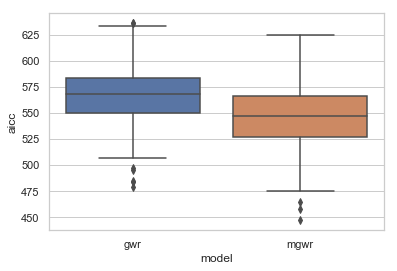

In [236]:
sns.set(style="whitegrid")
ax = sns.boxplot(y=df['aicc'],x=df['model'])

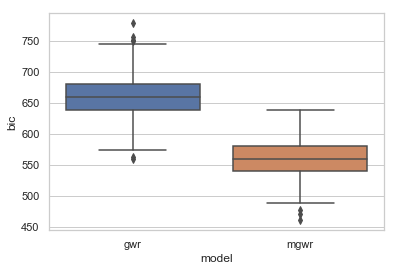

In [237]:
sns.set(style="whitegrid")
ax = sns.boxplot(y=df['bic'],x=df['model'])

### Parameter comparison from MGWR and GWR

In [238]:
mgwr_params_mean=np.mean(mgwr_params,axis=0)
gwr_params_mean=np.mean(gwr_params,axis=0)

In [239]:
gwr_params_mean

array([[0.3067761 , 1.61112717, 0.25188439],
       [0.30548072, 1.61354971, 0.25718085],
       [0.30388262, 1.615767  , 0.26371484],
       ...,
       [0.28701867, 1.70036409, 0.64775427],
       [0.28603807, 1.66458107, 0.65378055],
       [0.28553253, 1.63291637, 0.65880785]])

In [240]:
B0_mgwr=np.hsplit(mgwr_params_mean,3)[0]
B1_mgwr=np.hsplit(mgwr_params_mean,3)[1]
B2_mgwr=np.hsplit(mgwr_params_mean,3)[2]

In [241]:
B0_gwr=np.hsplit(gwr_params_mean,3)[0]
B1_gwr=np.hsplit(gwr_params_mean,3)[1]
B2_gwr=np.hsplit(gwr_params_mean,3)[2]

In [242]:
B0_mgwr=B0_mgwr.reshape(25,25)
B1_mgwr=B1_mgwr.reshape(25,25)
B2_mgwr=B2_mgwr.reshape(25,25)

In [243]:
np.mean(B2_mgwr),np.mean(B2_gwr),np.mean(B2)

(0.31096869038411673, 0.46536875267463274, 0.468)

In [244]:
B0_gwr=B0_gwr.reshape(25,25)
B1_gwr=B1_gwr.reshape(25,25)
B2_gwr=B2_gwr.reshape(25,25)

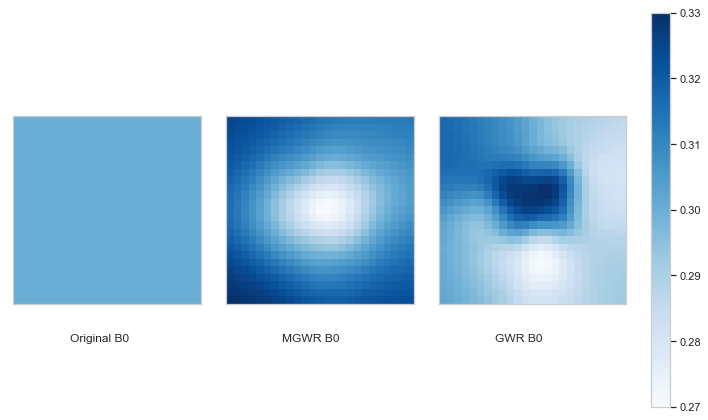

In [245]:
fig, (ax, ax2,ax3, cax) = plt.subplots(ncols=4,figsize=(10,6), 
                  gridspec_kw={"width_ratios":[1,1,1, 0.1],"height_ratios":[1]})
fig.subplots_adjust(wspace=0.3)
im = ax.imshow(B0, extent=[0,10, 0, 10], origin='lower',cmap='Blues')
ax.text(3, -2, 'Original B0')
im2  = ax2.imshow(B0_mgwr, extent=[0,10, 0, 10], origin='lower',cmap='Blues')
ax2.text(3, -2, 'MGWR B0')
im3 = ax3.imshow(B0_gwr, extent=[0,10, 0, 10], origin='lower',cmap='Blues')
ax3.text(3, -2, 'GWR B0')

divider = make_axes_locatable(ax3)

fig.colorbar(im, cax=cax)

ax.set_xticks([])
ax.set_yticks([])

ax2.set_xticks([])
ax2.set_yticks([])

ax3.set_xticks([])
ax3.set_yticks([])

plt.tight_layout()

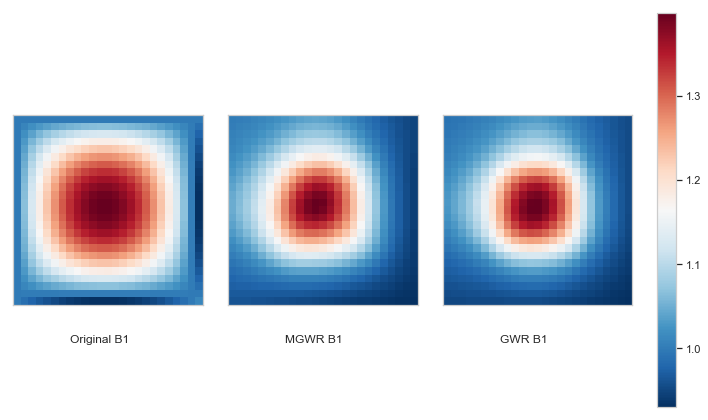

In [250]:
fig, (ax, ax2,ax3, cax) = plt.subplots(ncols=4,figsize=(10,6), 
                  gridspec_kw={"width_ratios":[1,1,1, 0.1],"height_ratios":[1]})
fig.subplots_adjust(wspace=0.3)
im = ax.imshow(B1, extent=[0,10, 0, 10], origin='lower',cmap='RdBu_r')
ax.text(3, -2, 'Original B1')
im2  = ax2.imshow(B1_mgwr, extent=[0,10, 0, 10], origin='lower',cmap='RdBu_r')
ax2.text(3, -2, 'MGWR B1')
im3 = ax3.imshow(B1_gwr, extent=[0,10, 0, 10], origin='lower',cmap='RdBu_r')
ax3.text(3, -2, 'GWR B1')

divider = make_axes_locatable(ax3)

fig.colorbar(im, cax=cax)

ax.set_xticks([])
ax.set_yticks([])

ax2.set_xticks([])
ax2.set_yticks([])

ax3.set_xticks([])
ax3.set_yticks([])

plt.tight_layout()

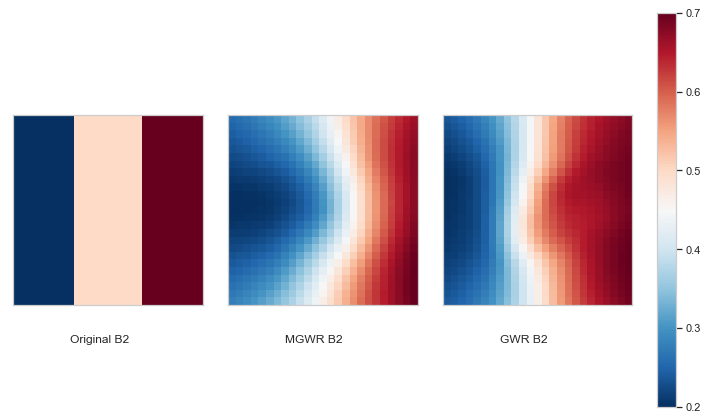

In [248]:
fig, (ax, ax2,ax3, cax) = plt.subplots(ncols=4,figsize=(10,6), 
                  gridspec_kw={"width_ratios":[1,1,1, 0.1],"height_ratios":[1]})
fig.subplots_adjust(wspace=0.3)
im = ax.imshow(B2, extent=[0,10, 0, 10], origin='lower',cmap='RdBu_r')
ax.text(3, -2, 'Original B2')
im2  = ax2.imshow(B2_mgwr, extent=[0,10, 0, 10], origin='lower',cmap='RdBu_r')
ax2.text(3, -2, 'MGWR B2')
im3 = ax3.imshow(B2_gwr, extent=[0,10, 0, 10], origin='lower',cmap='RdBu_r')
ax3.text(3, -2, 'GWR B2')

divider = make_axes_locatable(ax3)

fig.colorbar(im, cax=cax)

ax.set_xticks([])
ax.set_yticks([])

ax2.set_xticks([])
ax2.set_yticks([])

ax3.set_xticks([])
ax3.set_yticks([])

plt.tight_layout()

### Comparing parameters (MGWR and GWR)

$RMSE_j$ = $\sqrt{1/n \sum{(\beta_j (u_i, v_i) - \hat{\beta}(u_i, v_i))^2}}$

In [49]:
B0_g=np.hsplit(gwr_params_mean,3)[0]
B1_g=np.hsplit(gwr_params_mean,3)[1]
B2_g=np.hsplit(gwr_params_mean,3)[2]

In [50]:
B0_m=np.hsplit(mgwr_params_mean,3)[0]
B1_m=np.hsplit(mgwr_params_mean,3)[1]
B2_m=np.hsplit(mgwr_params_mean,3)[2]

In [51]:
b0 = B0.reshape(-1,1)
b1 = B1.reshape(-1,1)
b2 = B2.reshape(-1,1)

### $B_0$

In [52]:
rmse_b0_m=[]
for i in range(1000):
    rmse_b0_m.append(np.sqrt((np.sum((b0 - (np.hsplit(mgwr_params[i],3)[0]))**2))/625))
    
rmse_b0_g=[]
for i in range(1000):
    rmse_b0_g.append(np.sqrt((np.sum((b0 - (np.hsplit(gwr_params[i],3)[0]))**2))/625))

In [53]:
model=[]
model = ['gwr']*1000
model2 = ['mgwr']*1000
model=model+model2

rmse_b0 = rmse_b0_g+rmse_b0_m
d = {"model":model,"rmse_b0":rmse_b0}
df = pd.DataFrame(data=d)

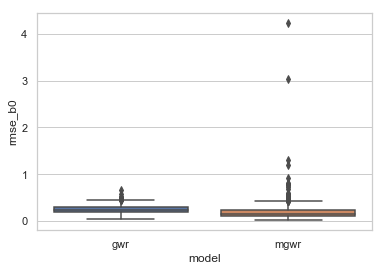

In [54]:
sns.set(style="whitegrid")
ax = sns.boxplot(y=df['rmse_b0'],x=df['model'])

### $B_1$

In [55]:
rmse_b1_m=[]
for i in range(1000):
    rmse_b1_m.append(np.sqrt((np.sum((b1 - (np.hsplit(mgwr_params[i],3)[1]))**2))/625))

In [56]:
rmse_b1_g=[]
for i in range(1000):
    rmse_b1_g.append(np.sqrt((np.sum((b1 - (np.hsplit(gwr_params[i],3)[1]))**2))/625))

In [57]:
model=[]
model = ['gwr']*1000
model2 = ['mgwr']*1000
model=model+model2
rmse_b1=[]
rmse_b1 = rmse_b1_g+rmse_b1_m
d = {"model":model,"rmse_b1":rmse_b1}
df = pd.DataFrame(data=d)

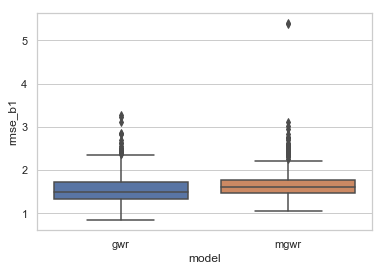

In [58]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=df['model'],y=df['rmse_b1'])

In [59]:
np.sqrt((np.sum((b1 - (np.hsplit(mgwr_params_mean,3)[1]))**2))/625)

1.4866075402421937

In [60]:
np.sqrt((np.sum((b1 - (np.hsplit(gwr_params_mean,3)[1]))**2))/625)

1.478083825075831

### $B_2$

In [61]:
rmse_b2_m=[]
for i in range(1000):
    rmse_b2_m.append(np.sqrt((np.sum((b2 - np.hsplit(mgwr_params[i],3)[2])**2))/625))
    
rmse_b2_g=[]
for i in range(1000):
    rmse_b2_g.append(np.sqrt((np.sum((b2 - np.hsplit(gwr_params[i],3)[2])**2))/625))

In [63]:
model=[]
model = ['gwr']*1000
model2 = ['mgwr']*1000
model=model+model2
rmse_b2=[]
rmse_b2 = rmse_b2_g+rmse_b2_m
d = {"model":model,"rmse_b2":rmse_b2}
df = pd.DataFrame(data=d)

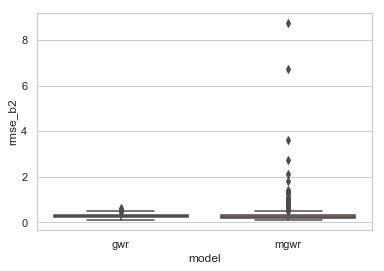

In [64]:
sns.set(style="whitegrid")
ax = sns.boxplot(y=df['rmse_b2'],x=df['model'])

In [65]:
np.sqrt((np.sum((b2 - (np.hsplit(mgwr_params_mean,3)[2]))**2))/625)

0.11400917143353939

In [66]:
np.sqrt((np.sum((b2 - (np.hsplit(gwr_params_mean,3)[2]))**2))/625)

0.07678429318198751